<a href="https://colab.research.google.com/github/Santosh0236/MnistDigitClassification/blob/master/MnistDigitClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# Description : This is for classify the handwritten digit images as a number 0-9

In [2]:
!pip install tensorflow keras numpy mnist matplotlib

In [3]:
# import the packages / dependencies 
import numpy as np
import mnist #Get data set from 
import matplotlib.pyplot as plt #For Graph 
%tensorflow_version 1.x
from keras.models import Sequential #ANN architecture 
from keras.layers import Dense #The Layer 
from keras.utils import np_utils

TensorFlow 1.x selected.


Using TensorFlow backend.


In [0]:
#load the dataset 
train_images = mnist.train_images() #training data images
train_labels = mnist.train_labels() #training data label
test_images = mnist.test_images() #test data images
test_labels = mnist.test_labels() #test data label

In [5]:
# Normalizing the images. Normalize the pixel values 
# [-0.5,0.5] to make our n/w easier to train 
train_images = (train_images/255) - 0.5
test_images = (test_images/255) - 0.5
# Flatten the images. Flatten each 28x28 image imto a 28^2 = 784 
# dimesnsional vector to pass into the neural network
train_images = train_images.reshape((-1,784))
test_images = test_images.reshape((-1,784))
# print the image 
print(train_images.shape)# 60,000 rows and 10,000 columns 
print(test_images.shape)# 10,000 rows and 10,000 columns 

(60000, 784)
(10000, 784)


In [0]:
# Build the model 
# 3 layers, 2 layers with 64 neurons and the relu function
# 1 layers with 10 neurons and softmax functions 
model = Sequential()
model.add(Dense(64, activation='relu',input_dim=784))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
# Compile the model 
# The Loss Function measures how well the model did on training ,and then tries to improve on it using the optimizer 
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy', #(classes that are greater than 2 )
    metrics= ['accuracy']
)

In [10]:
#Train the model 
model.fit(train_images,
          np_utils.to_categorical(train_labels), #Ex. 3 it expects [0,0,0,1,0,0,0,0,0,0]    
          epochs = 5, #The number of the iterations over the entire datasetto train on     
          batch_size = 32 # the number of samples per gradient update for training 
)

Epoch 1/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.1077 - acc: 0.9657
Epoch 2/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.0962 - acc: 0.9703
Epoch 3/5
60000/60000 [==============================] - 9s 157us/step - loss: 0.0882 - acc: 0.9722
Epoch 4/5
60000/60000 [==============================] - 9s 155us/step - loss: 0.0825 - acc: 0.9738
Epoch 5/5
60000/60000 [==============================] - 9s 152us/step - loss: 0.0751 - acc: 0.9764


In [11]:
# Evaluate the model 
model.evaluate(test_images,
          np_utils.to_categorical(test_labels)
          )

10000/10000 [==============================] - 1s 60us/step


[0.10028994138883426, 0.9702]

In [12]:
# model.save_weights('model.h5')
#predict the first 10 test images 
predictions = model.predict(test_images[:10])
print(predictions)

[[1.38974476e-09 1.92657623e-08 1.63924469e-05 9.67349024e-06
  5.56850850e-11 1.66426517e-09 1.01218413e-14 9.99971628e-01
  3.70076293e-07 1.95272469e-06]
 [1.48513035e-10 2.15499639e-03 9.97740269e-01 4.17683196e-07
  1.23041866e-09 2.60906677e-06 1.01716847e-04 2.61064420e-10
  8.35652081e-09 7.35272710e-15]
 [3.28199121e-07 9.97289777e-01 1.05079329e-04 1.50739615e-05
  1.29754175e-04 3.54643598e-05 6.77978387e-04 1.57302211e-03
  1.72729982e-04 7.72496207e-07]
 [9.99704301e-01 3.09483494e-10 5.32309277e-05 1.94388065e-07
  7.08077041e-10 5.61142451e-06 1.51538745e-06 2.11371342e-04
  8.53360689e-08 2.37431523e-05]
 [1.13600194e-07 9.26832566e-09 4.96232531e-07 6.28869401e-08
  9.91376996e-01 3.10164760e-05 5.78256186e-05 2.83844274e-04
  3.54449039e-05 8.21420457e-03]
 [2.80941563e-08 9.97925639e-01 2.82562360e-06 9.19248691e-07
  7.45757716e-05 3.28725953e-08 3.68259748e-07 1.99366733e-03
  1.65129165e-06 4.23590393e-07]
 [3.82468918e-14 2.04800829e-11 1.16647109e-10 5.98930294e

In [13]:
print(np.argmax(predictions,axis=1))

[7 2 1 0 4 1 4 9 6 9]


In [14]:
print(test_labels[0:10])

[7 2 1 0 4 1 4 9 5 9]


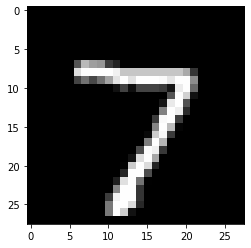

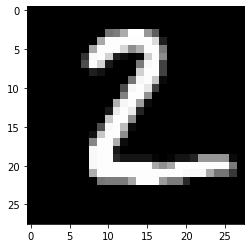

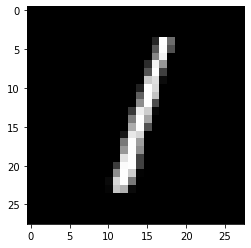

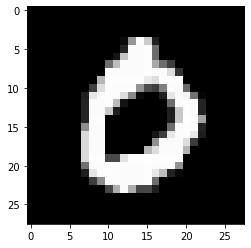

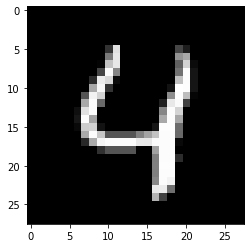

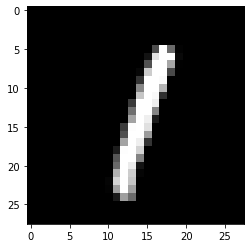

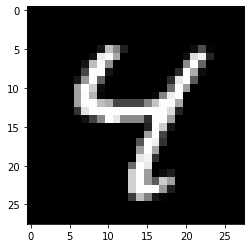

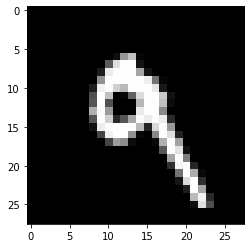

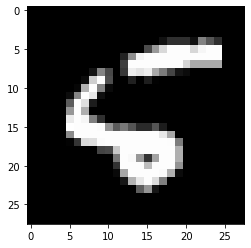

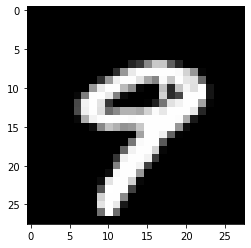

In [15]:
for i in range (0,10):
  first_image= test_images[i]
  first_image = np.array(first_image,dtype='float')
  pixels = first_image.reshape ((28,28))
  plt.imshow(pixels,cmap='gray')
  plt.show()